# Mounting Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Emotion Speech Recognition"
!cd "/content/drive/My Drive/Emotion Speech Recognition"
!ls

aa.wav		  features_dataframe  Others
Dataset		  hsangry.wav	      Predictions.csv
dataset_attr.csv  hssup.wav	      Predictions.xlsx
demo1.wav	  img_data	      RecordingHS.wav
demo_audio2.wav   kaggle.wav	      speech_emotion_recognition.ipynb
demo_audio4.wav   laugh1.wav	      Trained_Models
demo_audio5.wav   laugh.wav	      utils
demo_audio.wav	  model.json
drive  sample_data


In [ ]:
cd drive/'My Drive'/'Emotion Speech Recognition'/

/content/drive/My Drive/Emotion Speech Recognition


#  Installation of Dependencies


In [ ]:
import os
import librosa

import librosa.display

import IPython.display as ipd
from IPython.display import Image

%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd



import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D #, AveragePooling1D
from keras.layers import Flatten, Dropout, Activation # Input, 
from keras.layers import Dense #, Embedding
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

Populating the interactive namespace from numpy and matplotlib


# 1. Data Preparation

In [ ]:
data, sampling_rate = librosa.load('/content/drive/My Drive/Emotion Speech Recognition/Dataset/anger/anger016.wav')
ipd.Audio('/content/drive/My Drive/Emotion Speech Recognition/Dataset/anger/anger016.wav')

In [ ]:
sampling_rate

22050

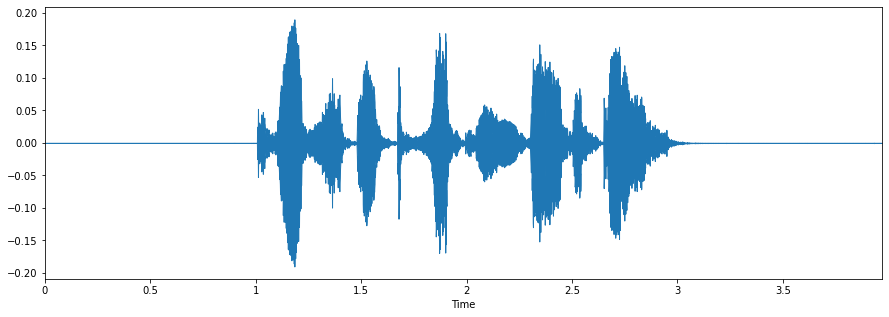

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

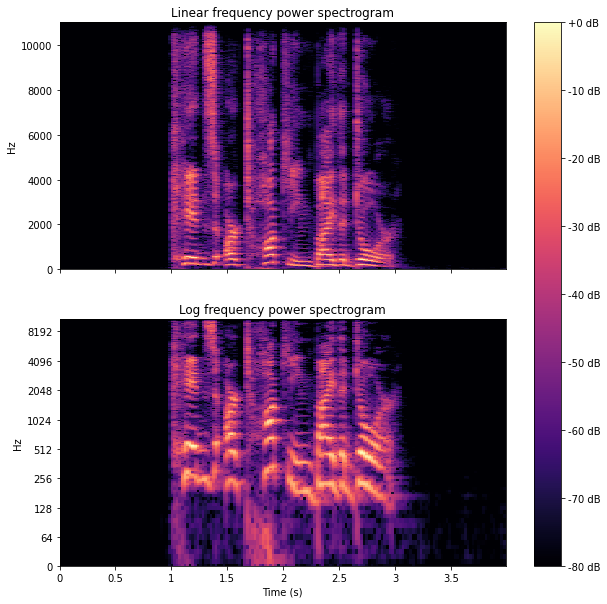

In [ ]:
d = librosa.stft(data)
D = librosa.amplitude_to_db(np.abs(d),ref=np.max)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(10,10))
img = librosa.display.specshow(D, y_axis='linear', x_axis='s',sr=sampling_rate,ax=ax[0])
ax[0].set(title='Linear frequency power spectrogram')
ax[0].label_outer()
librosa.display.specshow(D,y_axis='log',x_axis='s',sr=sampling_rate,ax=ax[1])
ax[1].set(title='Log frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format='%+2.f dB')

### Setup the Basic Paramter

In [ ]:
dataset_path = os.path.abspath('./Dataset')
destination_path = os.path.abspath('./')

randomize = True

split = 0.8

sampling_rate = 20000 
emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]

!ls


aa.wav		  features_dataframe  Others
Dataset		  hsangry.wav	      Predictions.csv
dataset_attr.csv  hssup.wav	      Predictions.xlsx
demo1.wav	  img_data	      RecordingHS.wav
demo_audio2.wav   kaggle.wav	      speech_emotion_recognition.ipynb
demo_audio4.wav   laugh1.wav	      Trained_Models
demo_audio5.wav   laugh.wav	      utils
demo_audio.wav	  model.json


### Converting Dataset in CSV format



In [ ]:
!cd "/content/drive/My Drive/Emotion Speech Recognition/utils"
from utils import dataset
# To know more about "create_and_load_meta_csv_df" function and it's working, go to "./utils/dataset.py" script. 
df, train_df, test_df = dataset.create_and_load_meta_csv_df(dataset_path, destination_path, randomize, split)

In [ ]:
print('Dataset samples  : ', len(df),"\nTraining Samples : ", len(train_df),"\ntesting Samples  : ", len(test_df))

Dataset samples  :  2555 
Training Samples :  2044 
testing Samples  :  511


# 2. Data Visualization

In [ ]:
df.head()

,path,label
0,/content/drive/My Drive/Emotion Speech Recogni...,0
1,/content/drive/My Drive/Emotion Speech Recogni...,2
2,/content/drive/My Drive/Emotion Speech Recogni...,1
3,/content/drive/My Drive/Emotion Speech Recogni...,4
4,/content/drive/My Drive/Emotion Speech Recogni...,2


In [ ]:
print("Actual Audio : ", df['path'][0])
print("Labels       : ", df['label'][0])


Actual Audio :  /content/drive/My Drive/Emotion Speech Recognition/Dataset/anger/anger250.wav
Labels       :  0



### Labels Assigned for emotions : 
- 0 : anger
- 1 : disgust
- 2 : fear
- 3 : happy
- 4 : neutral 
- 5 : sad
- 6 : surprise


In [ ]:
unique_labels = train_df.label.unique()
unique_labels.sort()
print("unique labels in Emtion dataset : ")
print(*unique_labels, sep=', ')
unique_labels_counts = train_df.label.value_counts(sort=False)
print("\n\nCount of unique labels in Emtion dataset : ")
print(*unique_labels_counts,sep=', ')

unique labels in Emtion dataset : 
0, 1, 2, 3, 4, 5, 6


Count of unique labels in Emtion dataset : 
347, 209, 339, 340, 261, 343, 205


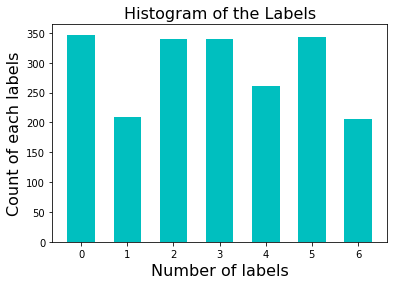

In [ ]:
# Histogram of the classes
plt.bar(unique_labels, unique_labels_counts,align = 'center', width=0.6, color = 'c')
plt.xlabel('Number of labels', fontsize=16)
plt.xticks(unique_labels)
plt.ylabel('Count of each labels', fontsize=16)
plt.title('Histogram of the Labels', fontsize=16)
plt.show()

# 3. Data Pre-Processing

In [ ]:
from utils.feature_extraction import get_features_dataframe
from utils.feature_extraction import get_audio_features

In [ ]:
trainfeatures = pd.read_pickle('./features_dataframe/trainfeatures')
trainlabel = pd.read_pickle('./features_dataframe/trainlabel')
testfeatures = pd.read_pickle('./features_dataframe/testfeatures')
testlabel = pd.read_pickle('./features_dataframe/testlabel')

In [ ]:

trainfeatures.shape

(2044, 65)

In [ ]:
trainfeatures = trainfeatures.fillna(0)
testfeatures = testfeatures.fillna(0)

In [ ]:


X_train = np.array(trainfeatures)
y_train = np.array(trainlabel).ravel()
X_test = np.array(testfeatures)
y_test = np.array(testlabel).ravel()


In [ ]:
y_train[:5]

array([3, 2, 2, 0, 3])

In [ ]:
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape

(2044, 65, 1)

# 4. Model Creation

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
opt = RMSprop(lr=0.00001, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 65, 256)           1536      
                                                                 
 activation (Activation)     (None, 65, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 65, 128)           163968    
                                                                 
 activation_1 (Activation)   (None, 65, 128)           0         
                                                                 
 dropout (Dropout)           (None, 65, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 128)           0         
 )                                                               
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

# 5. Training and Evaluation

### Removed the whole training part for avoiding unnecessary long epochs list

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=370, validation_data=(x_testcnn, y_test))

Epoch 1/370
128/128 [==============================] - 8s 50ms/step - loss: 2.0251 - accuracy: 0.1820 - val_loss: 1.8272 - val_accuracy: 0.2461
Epoch 2/370
128/128 [==============================] - 6s 46ms/step - loss: 1.8705 - accuracy: 0.2427 - val_loss: 1.7512 - val_accuracy: 0.2930
Epoch 3/370
128/128 [==============================] - 6s 48ms/step - loss: 1.7948 - accuracy: 0.2710 - val_loss: 1.7227 - val_accuracy: 0.3145
Epoch 4/370
128/128 [==============================] - 6s 48ms/step - loss: 1.7348 - accuracy: 0.3028 - val_loss: 1.6888 - val_accuracy: 0.3672
Epoch 5/370
128/128 [==============================] - 6s 47ms/step - loss: 1.7091 - accuracy: 0.3126 - val_loss: 1.6649 - val_accuracy: 0.3574
Epoch 6/370
128/128 [==============================] - 6s 47ms/step - loss: 1.6651 - accuracy: 0.3381 - val_loss: 1.6504 - val_accuracy: 0.3496
Epoch 7/370
128/128 [==============================] - 6s 47ms/step - loss: 1.6569 - accuracy: 0.3356 - val_loss: 1.6151 - val_accuracy:

### Loss Vs Iterations

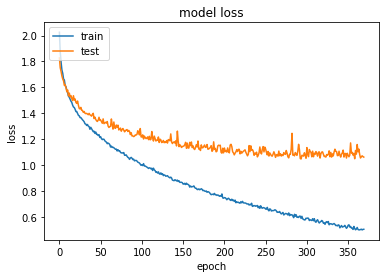

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Saving the model

In [ ]:
model_name = 'omar.h5'
save_dir = os.path.join(os.getcwd(), 'Trained_Models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Emotion Speech Recognition/Trained_Models/omar.h5 


In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

### Loading the model

In [ ]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("./Trained_Models/omar.h5")
print("Loaded model from disk")
 

loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 60.16%


# 6. Test Set Prediction

In [ ]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

16/16 [==============================] - 0s 20ms/step


In [ ]:
preds

array([[1.1944047e-01, 9.0276413e-03, 6.9420284e-01, ..., 6.7878693e-02,
        6.1709299e-03, 5.2349593e-02],
       [8.4984094e-01, 8.7563490e-04, 5.8910720e-02, ..., 3.2813692e-05,
        3.9381236e-03, 5.2518881e-04],
       [1.9796468e-02, 8.3053219e-01, 1.1692298e-02, ..., 9.3823113e-02,
        9.0267016e-03, 3.0636480e-02],
       ...,
       [2.0358027e-03, 3.7946942e-01, 5.6789958e-01, ..., 3.5747720e-03,
        7.6929294e-04, 2.3770725e-02],
       [5.6408402e-03, 6.6245433e-05, 1.0324234e-01, ..., 9.6435497e-06,
        2.9138687e-01, 1.7214601e-05],
       [3.1800203e-02, 1.0819147e-01, 1.4079814e-01, ..., 3.4625747e-03,
        3.6435090e-03, 6.1908150e-01]], dtype=float32)

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

array([2, 0, 1, 3, 3, 0, 3, 0, 3, 5, 2, 2, 0, 4, 4, 3, 0, 5, 4, 5, 2, 6,
       3, 4, 0, 3, 6, 2, 2, 3, 3, 4, 2, 3, 0, 3, 5, 3, 2, 3, 5, 6, 4, 0,
       5, 1, 1, 1, 1, 5, 1, 3, 2, 5, 4, 5, 2, 2, 5, 4, 4, 3, 5, 0, 0, 3,
       5, 2, 0, 3, 3, 2, 3, 2, 4, 5, 5, 6, 0, 1, 5, 6, 0, 2, 3, 3, 3, 2,
       2, 2, 5, 0, 4, 2, 2, 3, 6, 5, 4, 2, 2, 4, 5, 4, 3, 5, 2, 3, 6, 3,
       2, 0, 0, 3, 4, 5, 3, 5, 2, 0, 5, 3, 6, 0, 0, 5, 1, 2, 5, 1, 6, 3,
       1, 3, 4, 0, 3, 0, 3, 4, 0, 0, 1, 2, 0, 0, 1, 3, 4, 2, 5, 5, 4, 0,
       5, 5, 1, 2, 3, 5, 0, 5, 5, 5, 0, 3, 4, 4, 3, 6, 6, 5, 1, 4, 1, 1,
       3, 4, 5, 5, 1, 0, 4, 4, 0, 2, 2, 2, 1, 0, 3, 0, 4, 3, 4, 1, 0, 6,
       2, 0, 0, 2, 5, 4, 6, 3, 4, 5, 0, 4, 3, 3, 2, 2, 4, 4, 3, 5, 5, 4,
       5, 0, 0, 3, 4, 4, 1, 5, 5, 0, 5, 4, 4, 4, 2, 3, 4, 5, 1, 6, 6, 4,
       5, 2, 4, 5, 5, 2, 1, 0, 1, 4, 0, 5, 6, 1, 1, 1, 3, 4, 3, 3, 6, 4,
       2, 6, 5, 6, 2, 2, 5, 4, 2, 5, 0, 3, 2, 3, 0, 0, 2, 0, 5, 0, 3, 5,
       3, 6, 5, 1, 5, 3, 4, 6, 5, 0, 2, 5, 6, 0, 5,

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
predictions = (lb.inverse_transform((abc)))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,2
1,0
2,1
3,3
4,3
5,0
6,3
7,0
8,3
9,5


In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,2
1,0
2,1
3,2
4,3
5,6
6,6
7,5
8,3
9,5


In [ ]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [ ]:
finaldf[130:140]

,actualvalues,predictedvalues
130,1,6
131,5,3
132,1,1
133,3,3
134,4,4
135,0,0
136,3,3
137,0,0
138,1,3
139,6,4


In [ ]:
finaldf.to_csv('Predictions.csv', index=False)

# 7. Demonstration

In [ ]:
demo_audio_path = '/content/drive/My Drive/Emotion Speech Recognition/hsangry.wav'
ipd.Audio('/content/drive/My Drive/Emotion Speech Recognition/hsangry.wav')

In [ ]:
demo_mfcc, demo_pitch, demo_mag, demo_chrom = get_audio_features(demo_audio_path,sampling_rate)

mfcc = pd.Series(demo_mfcc)
pit = pd.Series(demo_pitch)
mag = pd.Series(demo_mag)
C = pd.Series(demo_chrom)
demo_audio_features = pd.concat([mfcc,pit,mag,C],ignore_index=True)

In [ ]:
demo_audio_features= np.expand_dims(demo_audio_features, axis=0)
demo_audio_features= np.expand_dims(demo_audio_features, axis=2)

In [ ]:
demo_audio_features.shape

(1, 65, 1)

In [ ]:
livepreds = loaded_model.predict(demo_audio_features, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 107ms/step


In [ ]:
livepreds

array([[0.4906387 , 0.02788785, 0.00282406, 0.45398578, 0.00078489,
        0.00060038, 0.02327831]], dtype=float32)

In [ ]:
# emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]
index = livepreds.argmax(axis=1).item()
index

0

In [ ]:
emotions[index]

'anger'